## Install and Setup a Spark session.

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("Weather Analysis").getOrCreate()

## <b>1 <span style='color:#0386f7de'>|</span> Reading and Understanding the Datasets</b>

In [ ]:
df_weather = spark.read.csv('/content/LCD_sample.csv', header=True, inferSchema=True)
df_weather.show(5)


+----------+--------------------+---------+--------+---------+-------------+----------+-------------------+----------------+------------------------+-------------------------+-------------------------+-------------------------+-------------------------+--------------------------+--------------------------+----------------------+---------------+-------------------+-------------------+---------------------+----------------------+--------------------+----------------------+-------------------+----------------------+------------------------------+------------------------------+------------------------------+------------------------------------------+----------------------------+-------------------------------+------------------------------+----------------------+----------------------+------------+-----------+------------------+-------------+--------------+---------------------------+----------------------------+---------------------+------------------+-----------------+-------------------

## <b>2 <span style='color:#0386f7de'>|</span> Data Cleaning</b>

In [ ]:
df_weather.count()

772

In [1]:
from pyspark.sql.functions import isnan, when, count, col

# Count non-NaN values for each field
df.select([count(when(~isnan(c) & ~col(c).isNull(), c)).alias(c) for c in ["HourlyDryBulbTemperatureF", "HourlyRelativeHumidity"]]).show()


ModuleNotFoundError: No module named 'pyspark'

In [ ]:
df = df.withColumn("HourlyDryBulbTemperatureF", when(col("HourlyDryBulbTemperatureF") == "", None).otherwise(col("HourlyDryBulbTemperatureF")))
df = df.withColumn("HourlyRelativeHumidity", when(col("HourlyRelativeHumidity") == "", None).otherwise(col("HourlyRelativeHumidity")))


In [ ]:
df = df.na.fill({"HourlyDryBulbTemperatureF": 0, "HourlyRelativeHumidity": 0})

In [ ]:
imputer = Imputer(
    inputCols=["HourlyDryBulbTemperatureF", "HourlyRelativeHumidity"],
    outputCols=["HourlyDryBulbTemperatureF_imputed", "HourlyRelativeHumidity_imputed"]
)


In [ ]:
pipeline_model = pipeline.fit(df)
df_transformed = pipeline_model.transform(df)


IllegalArgumentException: requirement failed: The input column ELEVATION_Index should have at least two distinct values.

In [ ]:
df_weather = df_weather.na.drop()

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import Imputer, OneHotEncoder, StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.linalg import Vectors

# Assuming 'HourlyDryBulbTemperatureF' and 'HourlyRelativeHumidity' are numerical features
# and 'ELEVATION' could be an example of a categorical feature.

# Impute missing values for numerical features
imputer = Imputer(
    inputCols=["HourlyDryBulbTemperatureF", "HourlyRelativeHumidity"],
    outputCols=["HourlyDryBulbTemperatureF_imputed", "HourlyRelativeHumidity_imputed"]
).setStrategy("median")

# StandardScaler for numerical features
scaler = StandardScaler(
    inputCol="num_features", outputCol="scaled_num_features", withStd=True, withMean=False
)

# StringIndexer and OneHotEncoder for categorical features
string_indexer = StringIndexer(
    inputCol="ELEVATION", outputCol="ELEVATION_Index"
)
encoder = OneHotEncoder(
    inputCols=["ELEVATION_Index"],
    outputCols=["ELEVATION_classVec"]
)

# VectorAssembler to combine numerical features into a single vector
assembler_num = VectorAssembler(
    inputCols=["HourlyDryBulbTemperatureF_imputed", "HourlyRelativeHumidity_imputed"],
    outputCol="num_features"
)

# Pipeline for the transformations
pipeline = Pipeline(stages=[
    imputer,
    assembler_num,
    scaler,
    string_indexer,
    encoder
])

# Fit the pipeline to the data
pipeline_model = pipeline.fit(df_weather)

# Transform the data
df_transformed = pipeline_model.transform(df_weather)

# Show the results
df_transformed.show()


Py4JJavaError: An error occurred while calling o432.fit.
: org.apache.spark.SparkException: surrogate cannot be computed. All the values in HourlyDryBulbTemperatureF,HourlyRelativeHumidity are Null, Nan or missingValue(NaN)
	at org.apache.spark.ml.feature.Imputer.fit(Imputer.scala:199)
	at org.apache.spark.ml.feature.Imputer.fit(Imputer.scala:115)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [ ]:
df_weather.count()

772

In [ ]:
from pyspark.sql.functions import col

# Count the number of nulls in the temperature and humidity columns
null_temp = df_weather.filter(col("HourlyDryBulbTemperatureF").isNull()).count()
null_humidity = df_weather.filter(col("HourlyRelativeHumidity").isNull()).count()

print(f"Null temperatures: {null_temp}")
print(f"Null humidities: {null_humidity}")


Null temperatures: 30
Null humidities: 30


In [ ]:
df_weather.show(5)

+----+-------------------------+----------------------+
|DATE|HourlyDryBulbTemperatureF|HourlyRelativeHumidity|
+----+-------------------------+----------------------+
+----+-------------------------+----------------------+



**i. Removing Missing Values**

In [ ]:
df_weather = df_weather.na.drop()

**ii. Filtering Rows**

In [ ]:
df_weather = df_weather.filter(df_weather["HourlyDryBulbTemperatureF"] > 0)

**iii. Selecting Relevant Columns**

In [ ]:
# df_weather = df_weather.select("DATE", "HourlyDryBulbTemperatureF", "HourlyRelativeHumidity")

**iv. Changing Data Types**

In [ ]:
from pyspark.sql.functions import col

# For Fahrenheit
df_weather = df_weather.withColumn("HourlyDryBulbTemperatureF", col("HourlyDryBulbTemperatureF").cast("float"))


In [ ]:
df_weather.show()

+----+-------------------------+----------------------+
|DATE|HourlyDryBulbTemperatureF|HourlyRelativeHumidity|
+----+-------------------------+----------------------+
+----+-------------------------+----------------------+



In [ ]:
df.count()


0

**Create our pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Pipelining Numerical Features
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

# Pipelining Categorical Features
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

# Combined both Numeric and Categorical features
processing_pipeline = ColumnTransformer(transformers=[('num pipeline', num_pipeline, numerical_vars),
                                                      ('cat pipeline', cat_pipeline, categorical_vars)])

print(processing_pipeline)

In [ ]:
# Drop rows with missing values
df_cleaned = df_weather.dropna()

cleaning_summary = {

    "original_rows": df_weather.shape[0],
    "cleaned_rows": df_cleaned.shape[0],
    "removed_rows": df_weather.shape[0] - df_cleaned.shape[0],
    "duplicate_rows_removed": df_weather.shape[0] - df_weather.drop_duplicates().shape[0]
}

cleaning_summary, df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 48 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     0 non-null      object 
 1   STATION_NAME                                0 non-null      object 
 2   ELEVATION                                   0 non-null      float64
 3   LATITUDE                                    0 non-null      float64
 4   LONGITUDE                                   0 non-null      float64
 5   DATE                                        0 non-null      object 
 6   reportType                                  0 non-null      object 
 7   HourlySkyConditions                         0 non-null      object 
 8   HourlyVisibility                            0 non-null      float64
 9   HourlyPresentWeatherType                    0 non-null      object 
 10  HourlyDryBulbTemperatureF      

({'original_rows': 772,
  'cleaned_rows': 0,
  'removed_rows': 772,
  'duplicate_rows_removed': 0},
 None)

In [ ]:
# Summary statistics
print(df_cleaned.describe())

       ELEVATION  LATITUDE  LONGITUDE  HourlyVisibility  \
count        0.0       0.0        0.0               0.0   
mean         NaN       NaN        NaN               NaN   
std          NaN       NaN        NaN               NaN   
min          NaN       NaN        NaN               NaN   
25%          NaN       NaN        NaN               NaN   
50%          NaN       NaN        NaN               NaN   
75%          NaN       NaN        NaN               NaN   
max          NaN       NaN        NaN               NaN   

       HourlyDryBulbTemperatureF  HourlyDryBulbTemperatureC  \
count                        0.0                        0.0   
mean                         NaN                        NaN   
std                          NaN                        NaN   
min                          NaN                        NaN   
25%                          NaN                        NaN   
50%                          NaN                        NaN   
75%                        

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Loop through each column
for column in df_weather.columns:
    try:
        # Attempt to convert the column to numeric
        df_weather[column] = pd.to_numeric(df_weather[column], errors='coerce')
        print(f"Converted column '{column}' successfully.")
    except:
        # Conversion failed, continue to the next column
        print(f"Could not convert column '{column}'.")
        continue

# Check if any column has been successfully converted
if df_weather.select_dtypes(include='number').shape[1] > 0:
    print("Successfully converted at least one column to numeric.")
else:
    print("No column could be converted to numeric.")

Converted column 'STATION' successfully.
Converted column 'STATION_NAME' successfully.
Converted column 'ELEVATION' successfully.
Converted column 'LATITUDE' successfully.
Converted column 'LONGITUDE' successfully.
Converted column 'DATE' successfully.
Converted column 'reportType' successfully.
Converted column 'HourlySkyConditions' successfully.
Converted column 'HourlyVisibility' successfully.
Converted column 'HourlyPresentWeatherType' successfully.
Converted column 'HourlyDryBulbTemperatureF' successfully.
Converted column 'HourlyDryBulbTemperatureC' successfully.
Converted column 'HourlyWetBulbTemperatureF' successfully.
Converted column 'HourlyWetBulbTemperatureC' successfully.
Converted column 'HourlyDewPointTemperatureF' successfully.
Converted column 'HourlyDewPointTemperatureC' successfully.
Converted column 'HourlyRelativeHumidity' successfully.
Converted column 'HourlyWindSpeed' successfully.
Converted column 'HourlyWindDirection' successfully.
Converted column 'HourlyWind

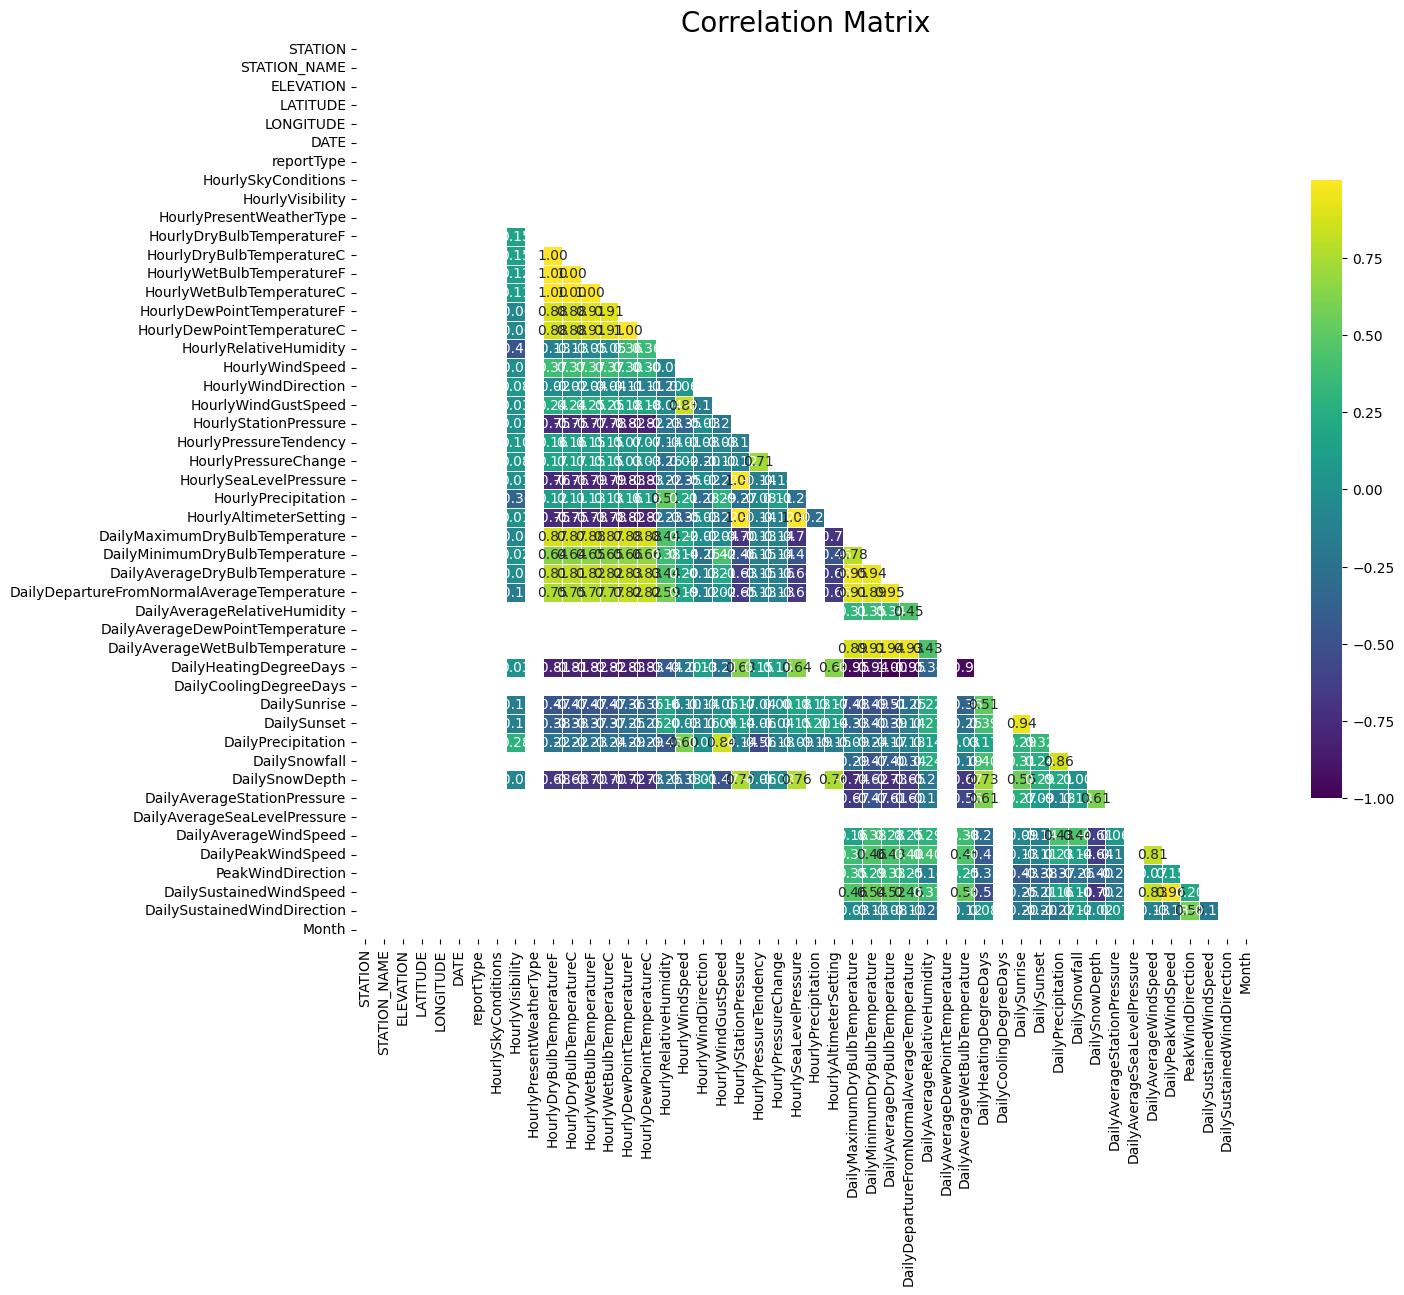

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlation matrix
correlation_matrix = df_weather.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(15, 15)) # You may need to adjust this depending on your display

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='viridis',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Improve the readability for the figure
plt.xticks(fontsize=10) # Increase or decrease based on your needs
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', fontsize=20)

# Show plot with a tight layout
plt.tight_layout()
plt.show()
